# Understanding the Gender Pay Gap

## Introduction

*TODO: Improve this section by incorporating feedback, and changing things based on your own improved understanding of the project

Gender wage disparity is a multifaceted issue rooted in societal norms and systemic biases. Despite progress made in terms of gender equality, there continues to be a disparity in wages in numerous vocations. Tozcek et al.’s 2021 study shows that even when considering relevant factors that could influence salary, there was still a discrepancy in pay. Rotman et al.’s 2022 study claims that understanding the gender wage gap and its enduring existence requires acknowledging the reality that women are paid less for their talents than men, rather than the differences in the qualities of male and female workers.

We aim to answer the question 'Is there a significant difference in the proportions of men and women who earn more than 50K in the United States?' Our response variable is the difference in proportions of men and women because this allows us to analyze the disparity in income. To estimate the variability around the differences between the proportions, we will use standard deviation as our scale parameter.

Our data comes from the 1994 Census and was used to predict whether an individual earns more than $50,000 USD annually. It has 15 variables, but we will focus on two categorical variables: `Sex` ("Male, "Female") and `Income` (">50K", "<=50K").

## Methods and Results

*TODO:
1. Complete data analysis
2. Interpret the results you obtain. It’s not enough to just state what a 90% confidence interval is, for example.
3. Answer: Do you think one of bootstrapping or asymptotics is more appropriate than the other? Why or why not? Explain why you think both methods gave you similar/different results, and whether you think one is more trustworthy than the other.

Be sure to incorporate feedback from the teaching team and your peers (as relevant), or make any improvements based on your own improved understanding of the project

### Preliminary Results

First, we load the necessary libraries and set the seed.

In [1]:
library(tidyverse)
library(tidymodels)
library(infer)
set.seed(12345)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

Now, we can read and tidy the dataset. Ideally we would use the entire dataset to conduct the analysis, but our data has too many observations for Jupyter Notebook to handle. Therefore, we will take a sample of size 1000 and use this for our analysis.

In [2]:
# Read and clean the data set
adult_data <- read_csv("https://raw.githubusercontent.com/janapc03/stat-201-group-15/main/data/adult.data")
colnames(adult_data) <- c("Age", "Workclass", "Fnlwgt", "Education", "Education-num", "Marital-Status", 
                          "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss", 
                          "Hours-per-Week", "Native_Country", "Income")

# Filter the selected dataset and take a sample size of 1000
adult_data <- adult_data %>%
    filter(Native_Country == "United-States") %>%
    select(Sex, Income) %>%
    rep_sample_n(size = 1000, reps = 1, replace = FALSE)
head(adult_data)
print("Figure 1: Tidied data")

Rows: 32560 Columns: 15
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (9): State-gov, Bachelors, Never-married, Adm-clerical, Not-in-family, W...
dbl (6): 39, 77516, 13, 2174, 0, 40

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


replicate,Sex,Income
<int>,<chr>,<chr>
1,Male,>50K
1,Male,<=50K
1,Female,<=50K
1,Male,>50K
1,Male,>50K
1,Male,<=50K


[1] "Figure 1: Tidied data"


Then, we visualize the counts of each class.

Income,Female,Male
<chr>,<int>,<int>
<=50K,297,439
>50K,43,221


[1] "Figure 2: Counts of each class"


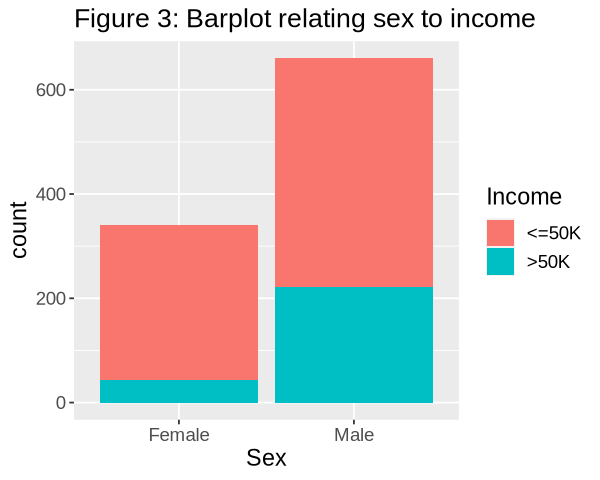

In [3]:
# Visualize counts
adult_data %>% 
    group_by(Sex, Income) %>% 
    tally() %>%
    spread(Sex, n)
print("Figure 2: Counts of each class")

# Plot the data
options(repr.plot.width = 5, repr.plot.height = 4)
ggplot(adult_data, aes(x = Sex, fill = Income)) +
    geom_bar() +
    labs(x = "Sex", title = "Figure 3: Barplot relating sex to income") +
    theme(text = element_text(size = 14), plot.title = element_text(size=16))

### Hypothesis Test Using the Bootstrapping Method

*TODO: Label plots and tables, add more interpretations and descriptions

The first method that we will use to conduct the hypothesis test is bootstrapping.

First, we calculate the observed difference in proportions.

In [4]:
# Compute estimate
obs_diff_prop <- adult_data %>%
    specify(formula = Income ~ Sex, success = ">50K") %>%
    calculate(stat = "diff in props", order = c("Male", "Female"))
obs_diff_prop
print("Figure 4: Observed difference in proportions")

stat
<dbl>
0.2083779


[1] "Figure 4: Observed difference in proportions"


To generate the null distribution, we will generate 1000 samples and compute calculate the proportion of men who earn more than 50,000 USD minus the proportion of women who earn more than 50,000 USD for each sample. 

In [5]:
bootstrapped_null <- adult_data %>%
    specify(formula = Income ~ Sex, success = ">50K") %>%
    hypothesize(null = "independence") %>% 
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = "diff in props", order = c("Male", "Female"))

head(bootstrapped_null)

replicate,stat
<int>,<dbl>
1,-0.001069519
2,-0.018894831
3,-0.045632799
4,-0.041176471
5,0.016755793
6,-0.036720143


Now, we can visualize the distribution of the bootstrapped differences in proportions in comparison to the observed test statistic.

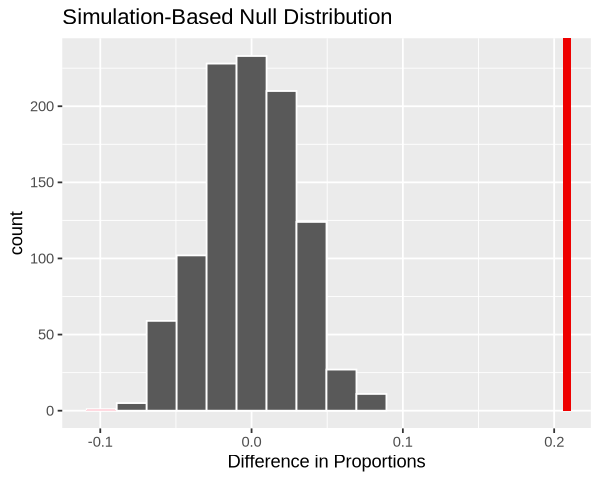

In [6]:
bootstrapped_dist <- bootstrapped_null %>% 
    visualize(bins = 10) + 
    shade_p_value(obs_stat = obs_diff_prop, direction = "both") +
    xlab("Difference in Proportions")

bootstrapped_dist

Then, we can calculate the p-value for the test.

In [7]:
p_value_boot <- bootstrapped_null %>%
    get_p_value(obs_stat = obs_diff_prop, direction = "both")
p_value_boot

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


Now we can compute a 95% confidence interval using the percentile based method.

In [8]:
percentile_ci <- bootstrapped_null %>% 
  get_confidence_interval(level = 0.95, type = "percentile")

percentile_ci

lower_ci,upper_ci
<dbl>,<dbl>
-0.05900178,0.05686275


Based on this calculation, we are 95% confident that the true difference in proportions lies between -0.066 and 0.043.

We can visualize the confidence interval.

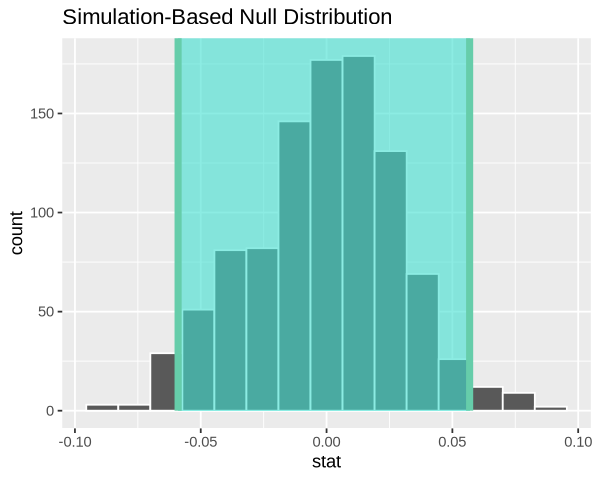

In [9]:
visualize(bootstrapped_null) + 
  shade_confidence_interval(endpoints = percentile_ci)

### Hypothesis Test Using Two Sample z-test

*TODO: visualize null distribution and test statistic, compute confidence interval, label plots and tables, add more interpretations and descriptions


We can also use asymptotic methods for our hypothesis test. Since we are comparing the proportions of two independent samples, we will use a two sample z-test.

We begin by calculating the test statistic.

In [10]:
n1 <- sum(adult_data$Sex == "Male")

phat1 <- adult_data %>%
    filter(Sex == "Male", Income == ">50K") %>%
    summarize(phat = n()/n1) %>%
    pull()

n2 <- sum(adult_data$Sex == "Female")

phat2 <- adult_data %>%
    filter(Sex == "Female", Income == ">50K") %>%
    summarize(phat = n()/n2) %>%
    pull()

phat <- (n1*phat1 + n2*phat2) / (n1+n2)

t_test_stat <- (phat1 - phat2) / sqrt(phat*(1-phat)*(1/n1 + 1/n2))
t_test_stat

[1] 7.08145

Now, we can calculate the p-value.

In [11]:
p_value_t <- 2*pnorm(t_test_stat, lower.tail = FALSE)
p_value_t

[1] 1.426536e-12

At a 5% and 1% significance level, we reject the null hypothesis.

In [12]:
summary <- tidy(
        prop.test(x = c(221,43),
                  n = c(660,340),
                  alternative = "two.sided",
                  correct = FALSE))
summary

estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.3348485,0.1264706,50.14694,1.426536e-12,1,0.1579344,0.2588214,2-sample test for equality of proportions without continuity correction,two.sided


### Interpretation

The bootstrapping method gave a p-value of 0 while the asymptotic method gave a p-value of 1.4265e-12. We can see that both of these p-values are very small, and therefore we will reject the null hypothesis at a 1% significance level. This means that there is enough evidence to suggest that the proportion of men who earn more than 50,000 USD is not equal to the proportion of women who earn more than 50,000 USD.

### Method Analysis

Using both bootstrapping and asymptotics, we believe that both methods are appropriate for inferential analysis. We get a very small p-value from both of our analyses which can be considered basically equivalent. We consider both methods to be equivalent as we have a large sample size(n=1000) with high repetitions(reps = 1000) which results in our bootstrapped sampling distribution closely resembling the sampling distribution for the population of working adults in the United States. Thus, using this distribution for our analysis should result in an accurate estimate of the p-value. Similarly for our theory based approach, we satisfy all conditions i.e. our sample size is large enough and samples were chosen independently without bias. Thus, using a two sample z-test should approximate the true test statistic pretty well, and our p-value should be accurate. A p-value of 1.4265e-12 reinforces our idea that both methods are appropriate for our analysis. While we'd consider bootstrapping to be more "trustworthy" as it represents the true sampling distribution and does not approximate it using CLT, it is also more computationally intensive and using a theory based approach might be a good alternative.

## Discussion

**Summary and Impact**

*TODO: Summarize what you found, and the implications/impact of your findings.

**Expectations**

*TODO: Discuss whether your results were what you expected to find

Through our hypothesis test, we expect to infer the reasonability of our null or alternative hypotheses about the difference in proportions of men and women that earn more than 50k in the U.S.
Our results could reveal significant findings in gender income inequality, which could bring more attention to issues regarding gender inequality and encourage an improvement in equity practices in various industries.

**Future Questions**

What other factors can contribute to the difference in income levels of men and women? 

How do the income levels of men and women change across other regions and countries?

How do demographics (such as race, age, and ethnicity) affect income levels?

## References

Becker, Barry and Kohavi, Ronny. (1996). Adult. UCI Machine Learning Repository. https://doi.org/10.24432/C5XW20

Toczek, L., Bosma, H., & Peter, R. (2021). “The Gender Pay Gap: Income Inequality Over Life Course - A Multilevel Analysis.” Frontiers in sociology, 6, 815376. https://doi.org/10.3389/fsoc.2021.815376

Rotman, A., & Mandel, H. (2023). “Gender-Specific Wage Structure and the Gender Wage Gap in the U.S. Labor Market.” Social indicators research, 165(2), 585–606. https://doi.org/10.1007/s11205-022-03030-4